In [1]:
# 1. Importar librerías
import pandas as pd
import numpy as np
import os
from datetime import datetime
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib


In [2]:
# 2. Cargar el dataset
data_path = os.path.join(os.path.dirname(os.getcwd()), 'data_sintetica', 'dataset_compras.csv')
df = pd.read_csv(data_path)
df.head()

,ID_Cliente,edad,ingresos,visitas_web,tiempo_web,productos_vistos,promociones_usadas,compra,monto_venta
0,C0001,30,2924.90,2.013366,-0.928528,0.893800,1.804473,0,0.00
1,C0002,33,2694.27,-0.242941,0.750742,-0.554035,1.387550,1,529.30
2,C0003,27,6515.97,-2.559062,-0.148233,-0.364018,0.355956,0,0.00
3,C0004,25,5469.12,0.887033,0.093840,-0.497945,2.831638,1,2144.86
4,C0005,28,2621.12,1.529819,-2.050463,1.430774,0.211051,0,0.00


In [3]:
# 3. Verificar columnas disponibles
print("Columnas disponibles:")
print(df.columns)

Columnas disponibles:
Index(['ID_Cliente', 'edad', 'ingresos', 'visitas_web', 'tiempo_web',
       'productos_vistos', 'promociones_usadas', 'compra', 'monto_venta'],
      dtype='object')


In [4]:
# 4. Definir variables predictoras y objetivo
X = df[['edad', 'ingresos', 'visitas_web', 'tiempo_web', 'productos_vistos', 'promociones_usadas']]
y = df['monto_venta']

In [5]:
# 5. Transformar características con PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

In [6]:
# 6. Separar datos en train y test
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

# Guardar transformador
transformador_path = os.path.join(os.path.dirname(os.getcwd()), 'resultados_modelos', 'regresion')
os.makedirs(transformador_path, exist_ok=True)
joblib.dump(poly, os.path.join(transformador_path, 'poly_transform.pkl'))

['c:\\cmder\\IDL1_Machine_Learning_I\\resultados_modelos\\regresion\\poly_transform.pkl']

In [7]:
# 7. Entrenar el modelo de regresión polinómica
modelo_poly = LinearRegression()
modelo_poly.fit(X_train, y_train)

# Guardar modelo entrenado
joblib.dump(modelo_poly, os.path.join(transformador_path, 'modelo_regresion_polinomica.pkl'))

['c:\\cmder\\IDL1_Machine_Learning_I\\resultados_modelos\\regresion\\modelo_regresion_polinomica.pkl']

In [8]:
# 8. Predecir
y_pred = modelo_poly.predict(X_test)

In [9]:
# 9. Evaluar modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.4f}")

MSE: 1576400.19
R²: 0.3401


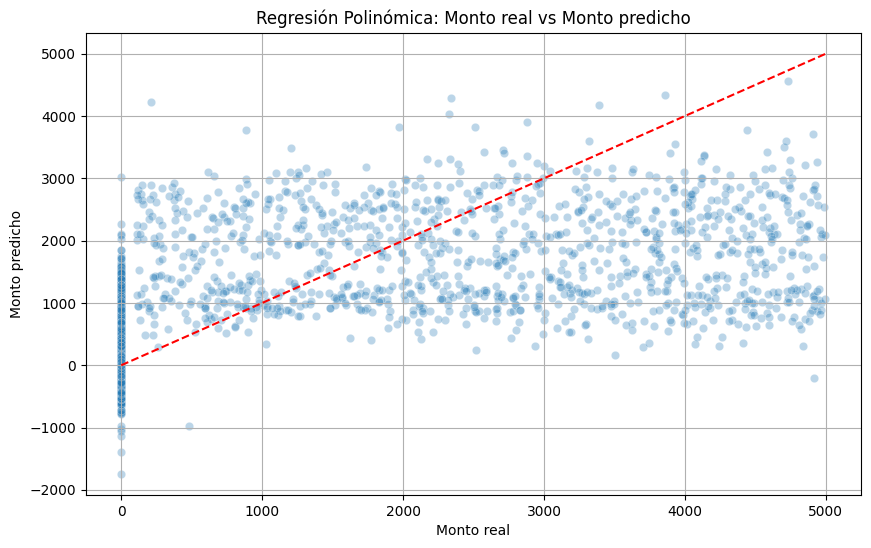

In [10]:
# 10. Visualización
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.title("Regresión Polinómica: Monto real vs Monto predicho")
plt.xlabel("Monto real")
plt.ylabel("Monto predicho")
plt.grid(True)
plt.show()

In [12]:
# 11. Guardar resultados en CSV
id_test = df.loc[y_test.index, 'ID_Cliente'].reset_index(drop=True)
df_resultados = pd.DataFrame({
    'ID_Cliente': id_test,
    'monto_real': y_test.reset_index(drop=True),
    'monto_predicho': y_pred.round(2),
    'error_absoluto': np.abs(y_test.reset_index(drop=True) - y_pred).round(2)
})

# Nombre del archivo con timestamp
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
file_name = f"resultados_regresion_polinomica_{timestamp}.csv"
output_path = os.path.join(transformador_path, file_name)

df_resultados.to_csv(output_path, index=False, encoding='utf-8-sig')
print(f"Resultados guardados en:\n{output_path}")

Resultados guardados en:
c:\cmder\IDL1_Machine_Learning_I\resultados_modelos\regresion\resultados_regresion_polinomica_20250720_152126.csv
